In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA, NMF
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.exceptions import ConvergenceWarning
from sklearn.svm import LinearSVC
from math import sqrt

warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/unlrw3-movie-ratings-dataset/movies.csv
/kaggle/input/unlrw3-movie-ratings-dataset/users.csv
/kaggle/input/unlrw3-movie-ratings-dataset/train.csv
/kaggle/input/unlrw3-movie-ratings-dataset/test.csv
/kaggle/input/learn-ai-bbc/BBC News Train.csv
/kaggle/input/learn-ai-bbc/BBC News Sample Solution.csv
/kaggle/input/learn-ai-bbc/BBC News Test.csv


**Extracting word features and show Exploratory Data Analysis (EDA) — Inspect, Visualize and Clean the Data (15 pts)**

Show a few visualizations like histograms. Describe any data cleaning procedures. Based on your EDA, what is your plan of analysis? 

Please feel free to look at online resources on processing raw texts to feature vectors. Many methods process texts to matrix form (word embedding), including TF-IDF, GloVe, Word2Vec, etc. Pick a method and process the raw texts to word embedding. Briefly explain the method(s) and how they work in your own words. Also, do exploratory data analysis such as word statistics and/or visualization.

As we did not learn natural language processing (NLP) specific techniques such as word embeddings in the lectures, we recommend reading discussions and example codes from others in the Kaggle and/or doing some research online to make sure you understand. You can refer to any resource as needed, but make sure you “demonstrate” your understanding- please include explaining in your own words, discussions, and your interpretation. Also importantly, please have a reference list at the end of the report. 

In [ ]:
We will begin by reading the data into a DataFrame.

In [7]:
df = pd.read_csv("/kaggle/input/learn-ai-bbc/BBC News Sample Solution.csv")
df_train    = pd.read_csv("/kaggle/input/learn-ai-bbc/BBC News Train.csv")
df_test     = pd.read_csv("/kaggle/input/learn-ai-bbc/BBC News Test.csv")

Next we will retrieve the first few rows,

In [7]:
print(df_train.head())

   ArticleId                                               Text  Category
0       1833  worldcom ex-boss launches defence lawyers defe...  business
1        154  german business confidence slides german busin...  business
2       1101  bbc poll indicates economic gloom citizens in ...  business
3       1976  lifestyle  governs mobile choice  faster  bett...      tech
4        917  enron bosses in $168m payout eighteen former e...  business


Run the .info() function.

In [8]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB
None


Get some basic statistics.

In [9]:
print(df_train.describe())

         ArticleId
count  1490.000000
mean   1119.696644
std     641.826283
min       2.000000
25%     565.250000
50%    1112.500000
75%    1680.750000
max    2224.000000


And finally check for missing values.

In [10]:
print(df_train.isnull().sum())

ArticleId    0
Text         0
Category     0
dtype: int64


We can begin by cleaning the text by removing uppercase, special characters, digits and whitespaces.

In [8]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text
df_train['cleaned_text'] = df_train['Text'].apply(clean_text)
df_test['cleaned_text'] = df_test['Text'].apply(clean_text)

We also remove duplicates.

In [9]:
initial_rows = len(df_train)
df_train = df_train.drop_duplicates()

Plotting category distributions

Category
sport            346
business         336
politics         274
entertainment    273
tech             261
Name: count, dtype: int64


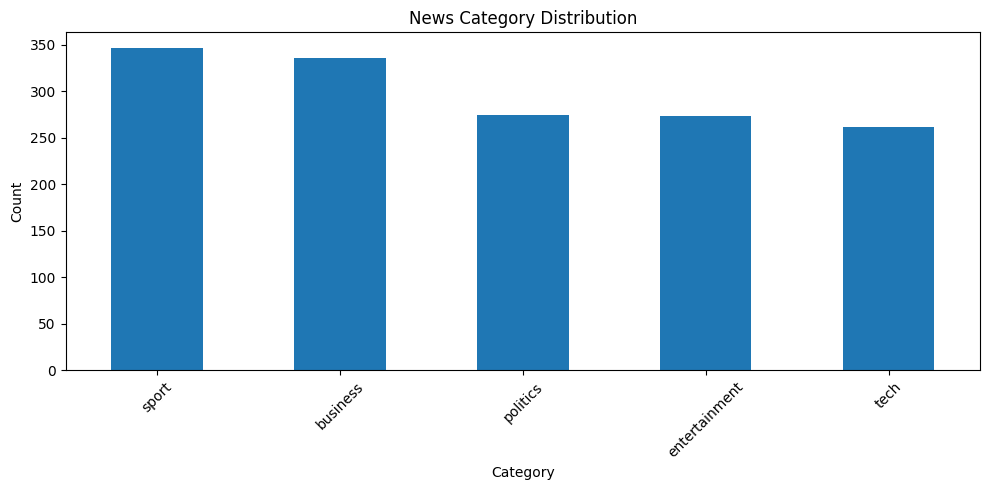

In [13]:
plt.figure(figsize=(10, 5))
df_train['Category'].value_counts().plot(kind='bar')
plt.title('News Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
print(df_train['Category'].value_counts())

Let's try plotting text length distribution.

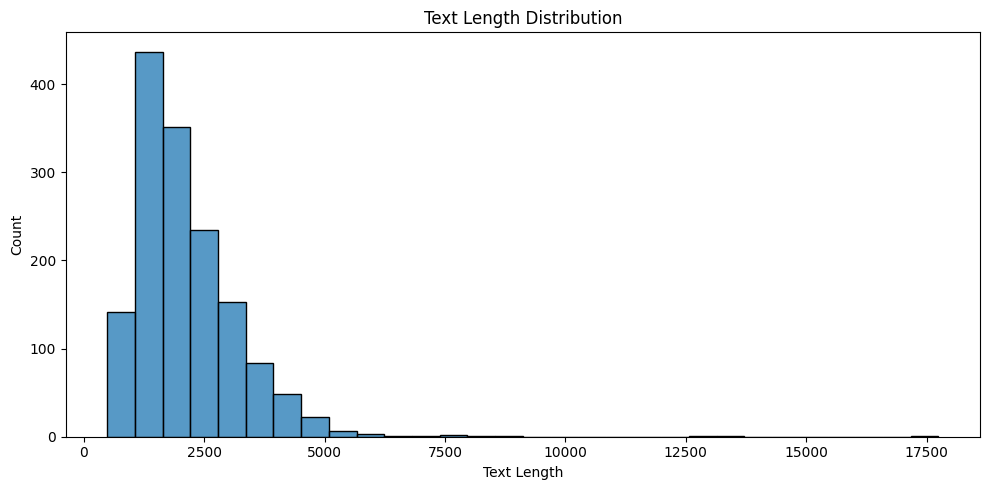

In [14]:
df_train['text_length'] = df_train['cleaned_text'].str.len()
plt.figure(figsize=(10, 5))
sns.histplot(data=df_train, x='text_length', bins=30)
plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Next, we will convert the text to embeddings. Embedding are defined by Cloudflare as vector representations of values or objects like text, images, and audio that are designed to be consumed by machine learning models and semantic search algorithms, embedding allow you to perform mathematical analysis on otherwise non-mathematical objects such as text or images.

Tf-idf will be used for this. Wikipedia defines tf-idf as a measure of importance of a word to a document in a collection or corpus, adjusted for the fact that some words appear more frequently in general. It is a combination of Term frequency, tf(t,d), which is the relative frequency of term t within document d, and the inverse document frequency is a measure of how much information the word provides, i.e., how common or rare it is across all documents.

We will start by vectoring the cleaned text and get feature names using the sklearn tf-idf library.

In [15]:
tfidf = TfidfVectorizer(max_features=1000, stop_words='english')
text_vectors = tfidf.fit_transform(df_train['cleaned_text'])
feature_names = tfidf.get_feature_names_out()

Next we will extract the most important words by category. We do this by retrieving the indices for each category, averaging the tf-idf scores for each category, and then getting the top words and their scores, we finish by plotting the top words of each category.

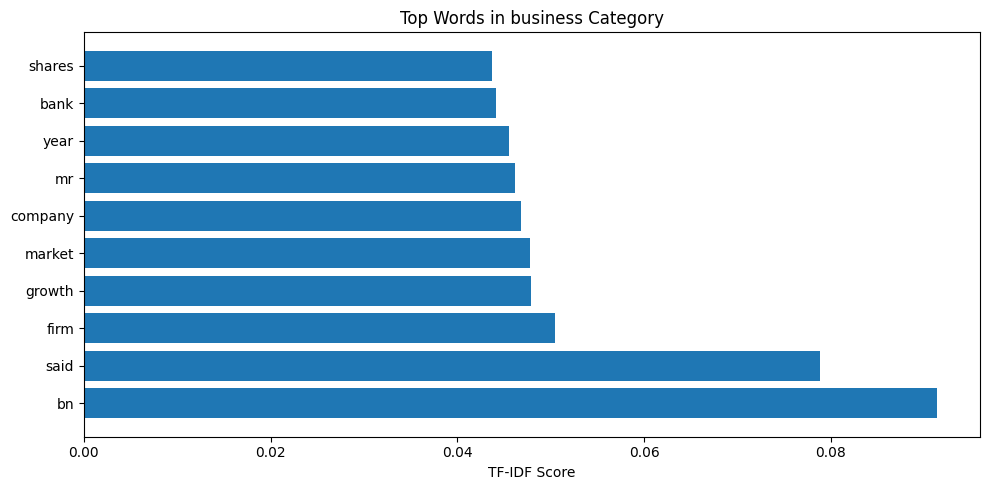

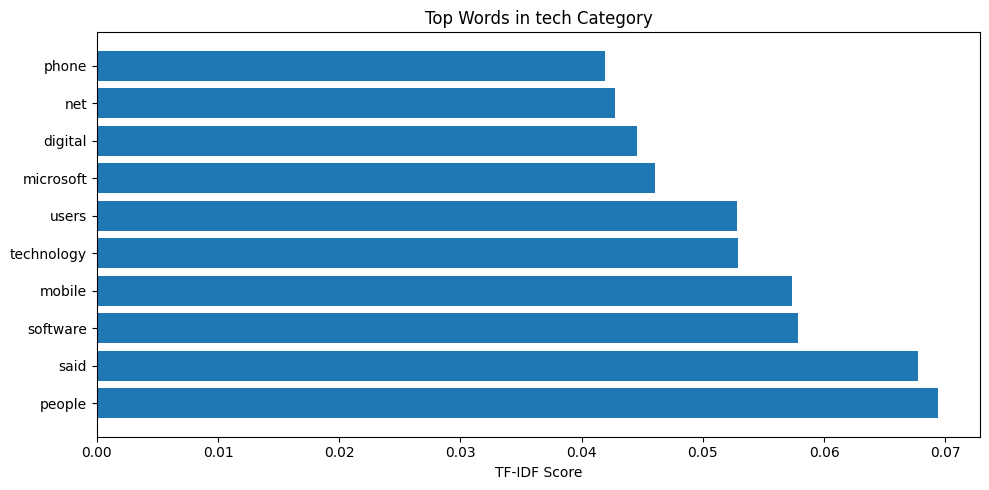

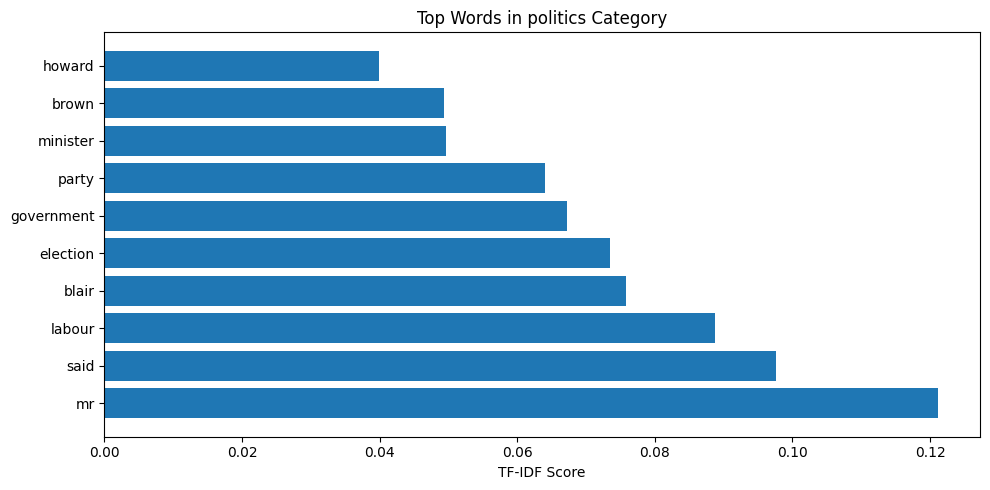

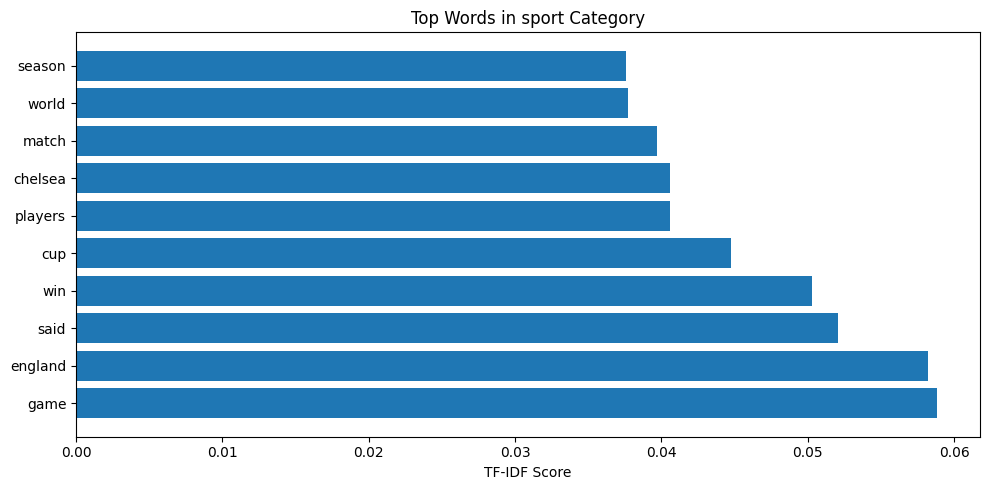

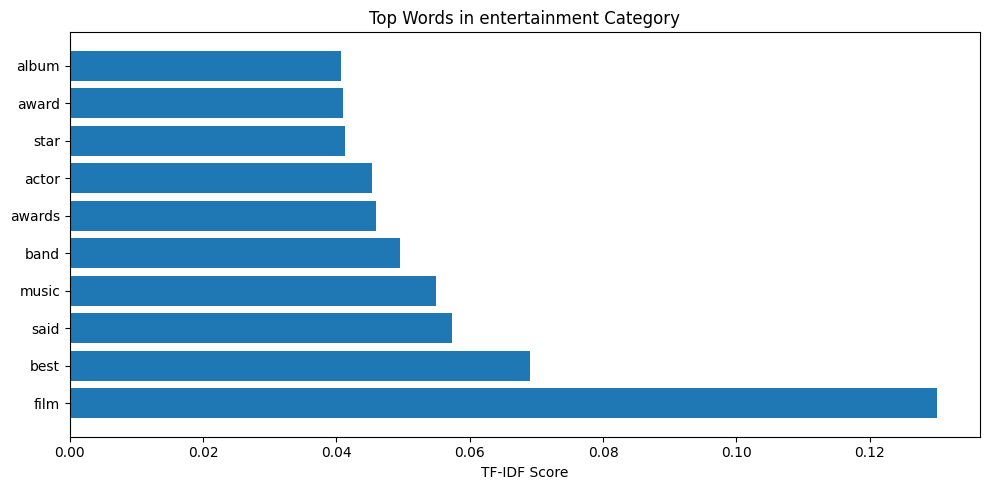

In [16]:
def get_top_words_tfidf(category_name, n=10):
    category_indices = df_train[df_train['Category'] == category_name].index
    category_tfidf = text_vectors[category_indices].mean(axis=0).A1
    top_indices = category_tfidf.argsort()[-n:][::-1]
    return [(feature_names[i], category_tfidf[i]) for i in top_indices]
categories = df_train['Category'].unique()
for category in categories:
    top_words = get_top_words_tfidf(category)
    plt.figure(figsize=(10, 5))
    words, scores = zip(*top_words)
    plt.barh(words, scores)
    plt.title(f'Top Words in {category} Category')
    plt.xlabel('TF-IDF Score')
    plt.tight_layout()
    plt.show()

Next we do some vector space analysis by using PCA dimensionality reduction. We reduce the high dimensional vector to 2D points, sorted by variance amount, and plot the documents in a 2D space, each dot represents a document, or a news article in this case, and similar documents should appear closer together, they are also colored by category.

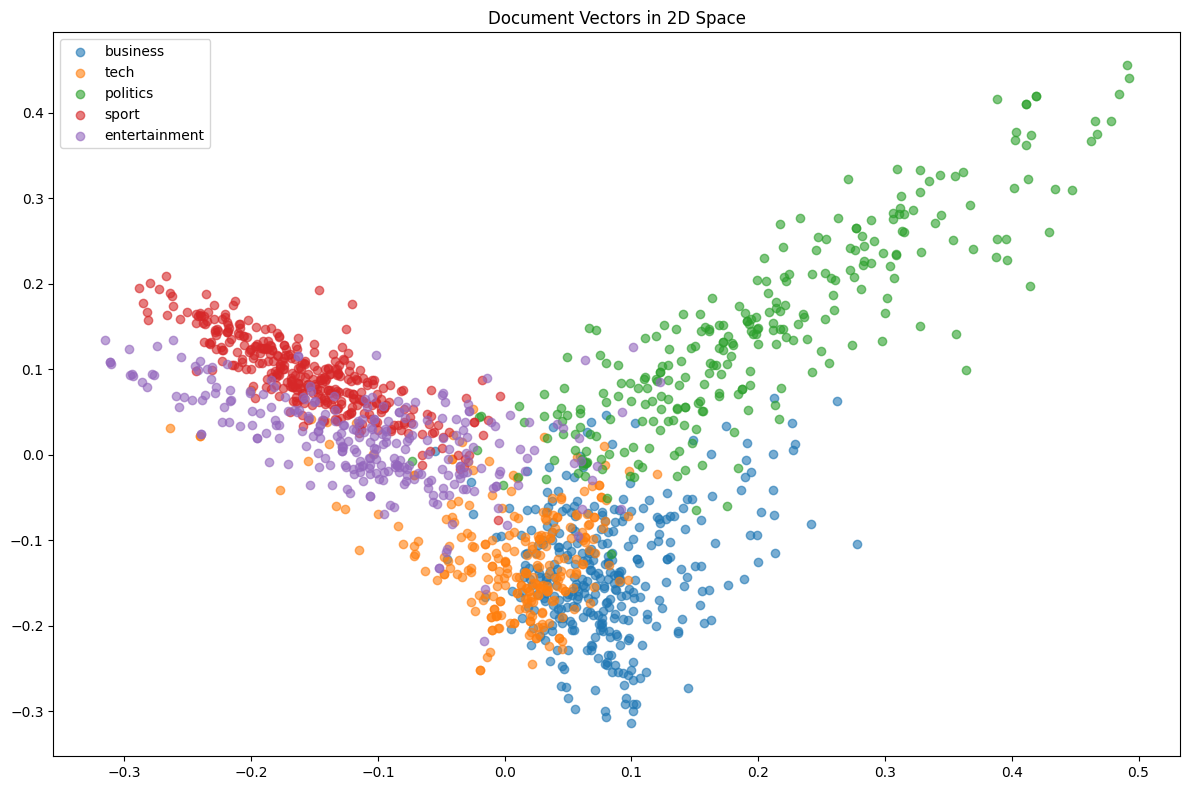

In [17]:
pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(text_vectors.toarray())
plt.figure(figsize=(12, 8))
for category in categories:
    mask = df_train['Category'] == category
    plt.scatter(vectors_2d[mask, 0], vectors_2d[mask, 1], label=category, alpha=0.6)
plt.title('Document Vectors in 2D Space')
plt.legend()
plt.tight_layout()
plt.show()

**Building and training models.**

In the Kaggle competition, the training data has labels (category). Thus, it can be solved using supervised learning. In general, the more labeled data we have, the more accurate the supervised learning model will be. But unsupervised learning can be powerful even when there is a small number of labels or no labels. This assignment will apply an unsupervised approach, especially the matrix factorization method, to discover topics in the news articles and use the labels to check the accuracy.

Here are some steps to guide this section: 
1) Think about this and answer: when you train the unsupervised model for matrix factorization, should you include texts (word features) from the test dataset or not as the input matrix? Why or why not?
2) Build a model using the matrix factorization method(s) and predict the train and test data labels. Choose any hyperparameter (e.g., number of word features) to begin with.
3) Measure the performances on predictions from both train and test datasets. You can use accuracy, confusion matrix, etc., to inspect the performance. You can get accuracy for the test data by submitting the result to Kaggle. 
4) Change hyperparameter(s) and record the results. We recommend including a summary table and/or graphs.
5) Improve the model performance if you can- some ideas may include but are not limited to; using different feature extraction methods, fit models in different subsets of data, ensemble the model prediction results, etc. 

To answer question 1, when training an unsupervised model you should not include test dataset data as the input matrix. This is because it could be a form of data leakage due to the model being able to learn patterns from data that is supposed to be tested later. Another reason is that we want to see how well the model generalizes unseen documents.

To build a model using matrix factorization we will create a tf-idf matrix. We will use non-negative matrix factorization or NMF and give it 100 hyperparameters to start with. We will then apply clustering with 5 clusters, encode the categories, train the classifier using the data we acquired, then make predictions and calculate the metrics. Finally, we will measure the performance with an accuracy score. Finally we will create a confusion matrix for train and test data.

In [18]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df_train['cleaned_text'])
n_components = 100
nmf = NMF(n_components=n_components, random_state=42, init='nndsvd')
doc_latent_features = nmf.fit_transform(tfidf_matrix)
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(doc_latent_features)
df_train['Cluster'] = clusters
label_encoder = LabelEncoder()
df_train['Category_Encoded'] = label_encoder.fit_transform(df_train['Category'])
X_train, X_test, y_train, y_test = train_test_split(
    doc_latent_features, 
    df_train['Category_Encoded'], 
    test_size=0.2, 
    random_state=42
)
classifier = LogisticRegression(max_iter=1000, random_state=42)
classifier.fit(X_train, y_train)
y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
print(f"Train accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")
print("Train Confusion Matrix:")
print(train_conf_matrix)
print("Test Confusion Matrix:")
print(test_conf_matrix)

Train accuracy: 0.7114
Test accuracy: 0.7248
Train Confusion Matrix:
[[244   1   1  15   0]
 [ 24 121   2  77   3]
 [ 44   2 109  62   1]
 [  0   0   0 283   0]
 [ 36  12   2  62  91]]
Test Confusion Matrix:
[[72  0  2  1  0]
 [ 6 25  0 14  1]
 [10  1 30 15  0]
 [ 0  0  0 63  0]
 [11  3  1 17 26]]


4) Change hyperparameter(s) and record the results. We recommend including a summary table and/or graphs.

We create a heatmap of different values for components and clusters and provide the most accurate one.

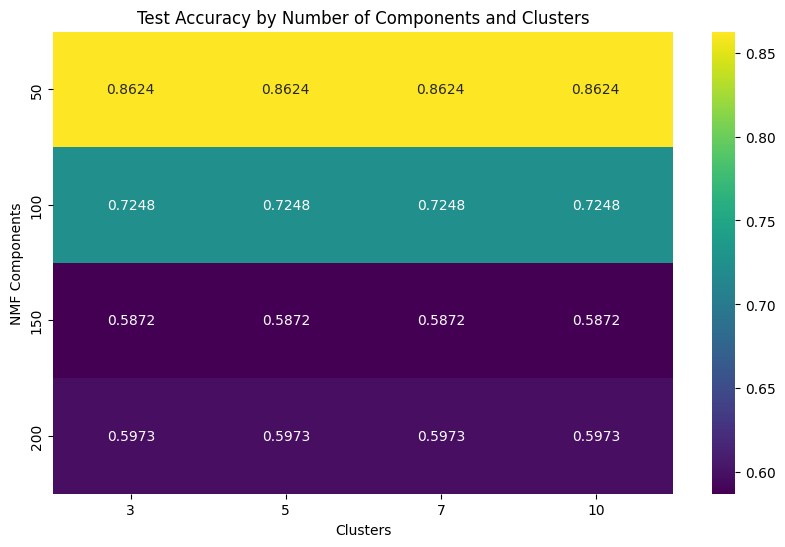


Full Results Table:
 NMF Components  Clusters  Train Accuracy  Test Accuracy
             50         3        0.869128       0.862416
             50         5        0.869128       0.862416
             50         7        0.869128       0.862416
             50        10        0.869128       0.862416
            100         3        0.711409       0.724832
            100         5        0.711409       0.724832
            100         7        0.711409       0.724832
            100        10        0.711409       0.724832
            150         3        0.619966       0.587248
            150         5        0.619966       0.587248
            150         7        0.619966       0.587248
            150        10        0.619966       0.587248
            200         3        0.587248       0.597315
            200         5        0.587248       0.597315
            200         7        0.587248       0.597315
            200        10        0.587248       0.597315

Best Conf

In [19]:
def run_experiment(n_components, n_clusters, random_state=42):
    tfidf_vectorizer = TfidfVectorizer(max_features=5000)
    tfidf_matrix = tfidf_vectorizer.fit_transform(df_train['cleaned_text'])
    nmf = NMF(n_components=n_components, random_state=random_state, init='nndsvd')
    doc_latent_features = nmf.fit_transform(tfidf_matrix)
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    clusters = kmeans.fit_predict(doc_latent_features)
    label_encoder = LabelEncoder()
    df_train['Category_Encoded'] = label_encoder.fit_transform(df_train['Category'])
    X_train, X_test, y_train, y_test = train_test_split(
        doc_latent_features, 
        df_train['Category_Encoded'], 
        test_size=0.2, 
        random_state=random_state
    )
    classifier = LogisticRegression(max_iter=1000, random_state=random_state)
    classifier.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, classifier.predict(X_train))
    test_accuracy = accuracy_score(y_test, classifier.predict(X_test))
    return train_accuracy, test_accuracy

components_range = [50, 100, 150, 200]
clusters_range = [3, 5, 7, 10]

results = []
for n_comp in components_range:
    for n_clust in clusters_range:
        train_acc, test_acc = run_experiment(n_comp, n_clust)
        results.append({
            'NMF Components': n_comp,
            'Clusters': n_clust,
            'Train Accuracy': train_acc,
            'Test Accuracy': test_acc
        })
results_df = pd.DataFrame(results)

pivot_table = results_df.pivot(
    index='NMF Components', 
    columns='Clusters', 
    values='Test Accuracy'
)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='.4f', cmap='viridis')
plt.title('Test Accuracy by Number of Components and Clusters')
plt.show()
print("\nFull Results Table:")
print(results_df.to_string(index=False))
best_result = results_df.loc[results_df['Test Accuracy'].idxmax()]
print("\nBest Configuration:")
print(f"NMF Components: {best_result['NMF Components']}")
print(f"Number of Clusters: {best_result['Clusters']}")
print(f"Test Accuracy: {best_result['Test Accuracy']:.4f}")
print(f"Train Accuracy: {best_result['Train Accuracy']:.4f}")

5) Improve the model performance if you can- some ideas may include but are not limited to; using different feature extraction methods, fit models in different subsets of data, ensemble the model prediction results, etc.

We managed to improve train data accuracy by reducing the max features used by the tf-idf vectorizer from 5000 to 1000, this presumably reduced overfitting of the data.

In [10]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df_train['cleaned_text'])
nmf = NMF(n_components=50, random_state=42, init='nndsvd')
doc_latent_features = nmf.fit_transform(tfidf_matrix)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(doc_latent_features)
df_train['Cluster'] = clusters
label_encoder = LabelEncoder()
df_train['Category_Encoded'] = label_encoder.fit_transform(df_train['Category'])
X_train, X_test, y_train, y_test = train_test_split(
    doc_latent_features, 
    df_train['Category_Encoded'], 
    test_size=0.2, 
    random_state=42
)
classifier = LogisticRegression(max_iter=1000, random_state=42)
classifier.fit(X_train, y_train)
y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
print(f"Train accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")
print("\nTrain Confusion Matrix:")
print(train_conf_matrix)
print("\nTest Confusion Matrix:")
print(test_conf_matrix)
test_tfidf = tfidf_vectorizer.transform(df_test['cleaned_text'])
test_latent_features = nmf.transform(test_tfidf)
test_predictions = classifier.predict(test_latent_features)

Train accuracy: 0.8767
Test accuracy: 0.8624

Train Confusion Matrix:
[[247   0   9   3   2]
 [  5 192   4  26   0]
 [ 12   0 173  32   1]
 [  2   0   0 281   0]
 [ 20   7   4  20 152]]

Test Confusion Matrix:
[[71  0  2  1  1]
 [ 2 35  0  8  1]
 [ 1  1 50  4  0]
 [ 0  0  0 63  0]
 [ 4  6  4  6 38]]


**Compare with supervised learning [30 pts]**

Use the following steps to guide your work:

1) Pick and train a supervised learning method(s) and compare the results (train and test performance)

We will attempt linear SVC since it is optimized for text classification with a large feature space. It is also faster than SVM and tends to perform well with tf-idf features.

In [11]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X = tfidf_vectorizer.fit_transform(df_train['cleaned_text'])
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df_train['Category'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svm_classifier = LinearSVC(max_iter=1000, random_state=42)
svm_classifier.fit(X_train, y_train)
y_train_pred = svm_classifier.predict(X_train)
y_test_pred = svm_classifier.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
print(f"Train accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")
print("\nTrain Confusion Matrix:")
print(train_conf_matrix)
print("\nTest Confusion Matrix:")
print(test_conf_matrix)

Train accuracy: 0.9983
Test accuracy: 0.9732

Train Confusion Matrix:
[[260   0   0   0   1]
 [  0 227   0   0   0]
 [  0   0 218   0   0]
 [  0   0   0 283   0]
 [  0   1   0   0 202]]

Test Confusion Matrix:
[[74  0  1  0  0]
 [ 2 43  1  0  0]
 [ 1  0 54  1  0]
 [ 0  0  0 63  0]
 [ 1  0  0  1 56]]


The supervised approach has greater accuracy than the unsupervised approach, to the point where it might be potential overfitting. However the supervised approach also far data hungry since it needs examples that are labeled to operate.

**Complete Part 2.**

Limitation(s) of sklearn’s non-negative matrix factorization library. [20 pts]

1. Load the movie ratings data (as in the HW3-recommender-system) and use matrix factorization technique(s) and predict the missing ratings from the test data. Measure the RMSE. You should use sklearn library. [10 pts]

In [2]:
train_csv = os.path.join('/kaggle/input/unlrw3-movie-ratings-dataset/movies.csv')
test_csv = os.path.join('/kaggle/input/unlrw3-movie-ratings-dataset/movies.csv')
test_df = pd.read_csv(test_csv)
df = pd.read_csv(train_csv)
df.head()

,mID,title,year,Doc,Com,Hor,Adv,Wes,Dra,Ani,...,Chi,Cri,Thr,Sci,Mys,Rom,Fil,Fan,Act,Mus
0,1,Toy Story,1995,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
1,2,Jumanji,1995,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,3,Grumpier Old Men,1995,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale,1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II,1995,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now that the data is imported we will use NMF factorization and measure the RMSE.

In [3]:
genre_cols = df.columns[df.columns.get_loc('year')+1:].tolist()
X = df[genre_cols].values
X_test = test_df[genre_cols].values
print(f"Data shape: {X.shape}")
print(f"Number of genres: {len(genre_cols)}")
n_components = min(X.shape[0], X.shape[1]) - 1
print(f"Using {n_components} components")
nmf = NMF(n_components=n_components, init='nndsvd', random_state=42)
W = nmf.fit_transform(X)
H = nmf.components_
X_pred = np.dot(W, H)
rmse = sqrt(mean_squared_error(X_test, X_pred))
print(f"\nRMSE: {rmse:.4f}")
print("\nExample predictions vs actual:")
for i in range(3):  # Show first 3 movies
    print(f"\nMovie: {df['title'].iloc[i]}")
    print("Actual:", X[i])
    print("Predicted:", X_pred[i].round(3))

Data shape: (3883, 18)
Number of genres: 18
Using 17 components

RMSE: 0.0244

Example predictions vs actual:

Movie: Toy Story
Actual: [0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0]
Predicted: [0.    1.    0.    0.    0.    0.    1.    0.    1.    0.    0.    0.
 0.    0.    0.012 0.    0.    0.   ]

Movie: Jumanji
Actual: [0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0]
Predicted: [0.    0.    0.    1.    0.    0.    0.    0.    0.997 0.    0.    0.
 0.    0.    0.    1.    0.    0.   ]

Movie: Grumpier Old Men
Actual: [0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
Predicted: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


2. Discuss the results and why sklearn's non-negative matrix facorization library did not work well compared to simple baseline or similarity-based methods we’ve done in Module 3. Can you suggest a way(s) to fix it? [10 pts]

I believe NMF performed poorly on this data because it has a mismatch with binary data. NMF produces continuous, granular predictions with values between simple 1s and 0s that indicate genres. It is also fairly data hungry but there are only a few genres to choose from which means a similarity based method would most likely work better. An example of a similarity based method that might work better is cosine similarity. This would preserve the binary nature of the data better, counteracting the relative sparsity of the data.

References: 

https://en.wikipedia.org/wiki/Tf–idf#Definition

https://www.cloudflare.com/learning/ai/what-are-embeddings/